In [1]:
from pydynverse.wrap import wrap_expression, infer_trajectory, add_dimred
from pydynverse.methods import ti_comp1, ti_slingshot, ti_monocle_ddrtree, ti_mst, ti_scuba, ti_angle, ti_grandprix, ti_paga
from pydynverse.plot import plot_dimred
from pydynverse.dimred import dimred_mds

from pydynverse import logger

logger.setLevel("DEBUG")

In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = wrap_expression(
    counts=fibroblast_reprogramming_treutlein.rx2["counts"],
    expression=fibroblast_reprogramming_treutlein.rx2["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2024年11月26日 15时38分33秒] DEBUG    Resolving cell_ids and feature_ids                                          
                        DEBUG    Dataset created: {'id': '20241126_153833__data_wrapper__OoGywolGOv', 'cell_ids':  
                                 array(['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04', '1_iN1_C05',           
                                        '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10', '1_iN1_C11',           
                                        '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15', '1_iN1_C16',           
                                        '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21', '1_iN1_C22',           
                                        '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27', '1_iN1_C29',           
                                        '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34', '1_iN1_C35',           
                                        '1_iN1_C36', '1_iN1_C37', '1_iN1_C38',

In [ ]:
# 2. 选择方法(method), 目前stuba和grandprix有点问题
# methods_selected_list = [ti_comp1(), ti_slingshot(), ti_monocle_ddrtree(), ti_mst(), ti_scuba(), ti_angle(), ti_grandprix()]
methods_selected_list = [ti_angle()]
methods_selected = methods_selected_list[0]
logger.info(f"Methods {methods_selected} selecting finished")

                        DEBUG    Docker image(dynverse/ti_mst:v0.9.9.01) loaded                                    
                        INFO     Methods {'method': {'id': 'mst', 'name': 'MST', 'source': 'offtheshelf',          
                                 'platform': 'R'}, 'wrapper': {'type': 'dimred_projection', 'topology_inference':  
                                 'free', 'trajectory_types': ['linear', 'bifurcation', 'convergence',              
                                 'multifurcation', 'tree'], 'input_required': 'expression', 'inputs':      input_id
                                 required        type                                                              
                                 0  expression      True  expression                                               
                                 1      dimred     False   parameter                                               
                                 2        ndim     False   parameter}, '

In [4]:
# 3. 运行方法(wrap)
model = infer_trajectory(dataset, methods_selected)
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmp9g83jiy1                                                         
[2024年11月26日 15时38分34秒] DEBUG    Save json successfully, path: /tmp/tmp9g83jiy1/input.json                   
                        DEBUG    h52json script:                                                                   
                                 /home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/util/../rscript/docker_i
                                 nput_json2h5.R                                                                    
[2024年11月26日 15时38分35秒] DEBUG    CompletedProcess(args=['/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydyn
                                       verse/util/../rscript/docker_input_json2h5.R', '--input_json_filename',     
                                       '/tmp/tmp9g83jiy1/input.json', '--input_h5_filename',                       
                                       '/tmp/tmp9g83jiy1/input.h5'], returncode=0, s

                        INFO     Coloring by grouping                                                              
                        INFO     Result plotting finished                                                          


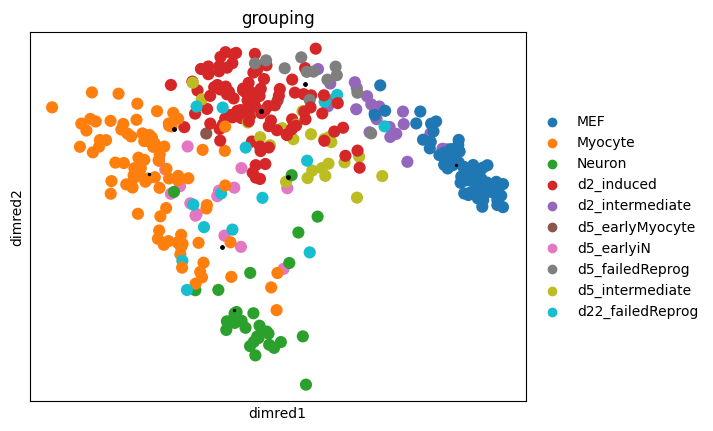

In [5]:
# 4. 绘制轨迹(dimred+plot)
# model = add_dimred(model, dimred_mds,  expression_source=dataset["expression"])  # 提取降维结果, 直接从docker输出容器获得
plot_dimred(model, expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein.rx2["grouping"]))
logger.info("Result plotting finished")